# Analyzing Naming Trends Using Python

Problem Statement: Extract the dataset in the program, visualize the number of 'male' and 'female' babies born in a particular year, and find out popular baby names

Hint: First, use Pandas, zipfile, and BytesIO library to extract the data. Find out a way to extract only files that consists useful data

pd.read_csv(BytesIO(z.read(file_name)),encoding='utf-8',engine='python',header=None)

Then visualize the number of male and female babies born in a particular year with the help of pandas pandas.DataFrame.plot, then Analyze the baby names by sorting out all birth counts

Then, analyze baby names by sorting out top 100 birth counts and group them by names to find out the popular baby names.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from zipfile import ZipFile
%matplotlib inline

baby_names = ZipFile("D:\\Python Program\\Projects\\Naming Trends Project - 1\\names.zip").extractall('.')
baby_names

In [2]:
# Loop through the years from 1880 to 2021 and for each year, it reads in a file named 'yob(year).txt'
# Using 'pd.read_csv()' function. The file is expected to have 3 columns and these column names are
# passed as the 'names' parameter. 
# Resulting DataFrame is appending to the 'years' list. The last line of the loop adds a new column to the DF named 'year'
# sets its value to the current yeat from the loop
# The year column added in each dataframe, and each dataframe will have the data of 1 year from 1880 to 2021.

years = []
for year in range(1880, 2021):
    year = str(year)
    years.append(pd.read_csv(f'yob{year}.txt', names = ['Name', 'Sex', 'Babies']))
    years[-1]['Year'] = year

In [3]:
# Concatenate these dataframes into a single dataframes using the 'pd.contact()' function'

result = pd.concat(years, axis=0, ignore_index=True)
result

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2021239,Zykell,M,5,2020
2021240,Zylus,M,5,2020
2021241,Zymari,M,5,2020
2021242,Zyn,M,5,2020


In [4]:
print(result.head())

        Name Sex  Babies  Year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


In [5]:
# Total no of male and female birth in year 1880

births_1880 = result[result['Year'] == 1880]
births_1880_bygender = births_1880.groupby('Sex').sum()
print(births_1880_bygender)

Empty DataFrame
Columns: [Babies]
Index: []


In [6]:
# Total birth of Male and Female babies in each year by using pivot_table()

total_birth = pd.pivot_table(data=result, index=['Year'],columns=['Sex'],values=['Babies'],aggfunc='sum')
total_birth

Babies         
Sex         F        M
Year                  
1880    90994   110490
1881    91953   100737
1882   107847   113686
1883   112319   104625
1884   129019   114442
...       ...      ...
2016  1769164  1894723
2017  1723043  1847191
2018  1696917  1811738
2019  1673030  1788414
2020  1609171  1718248

[141 rows x 2 columns]

C:\Users\praka\AppData\Local\Temp\ipykernel_4972\2518386022.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


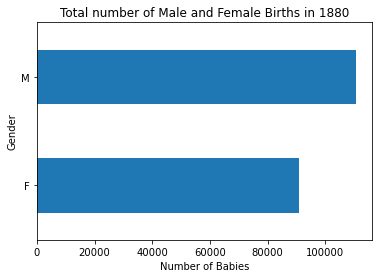

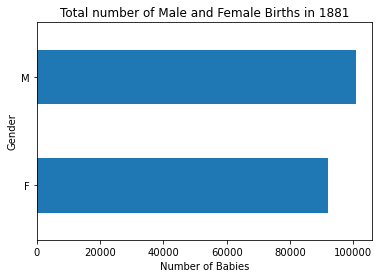

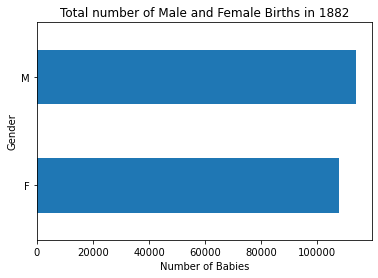

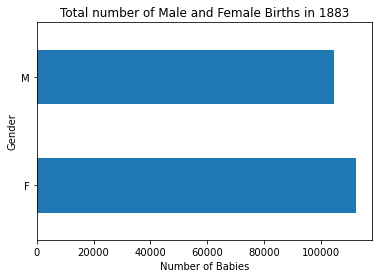

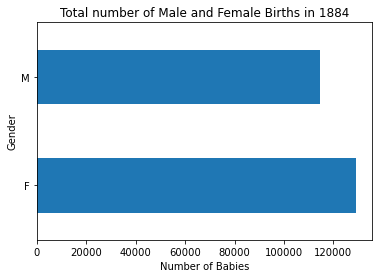

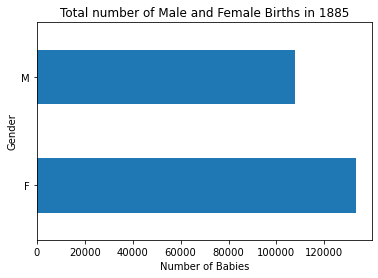

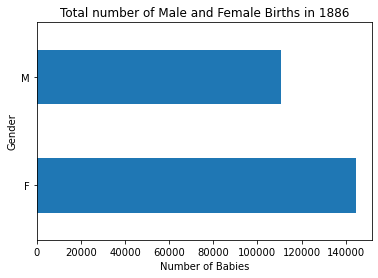

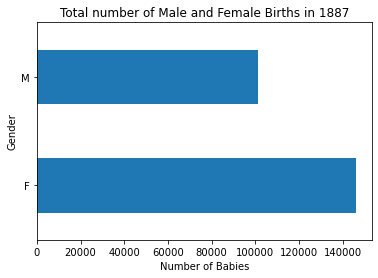

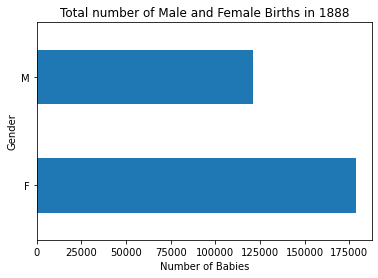

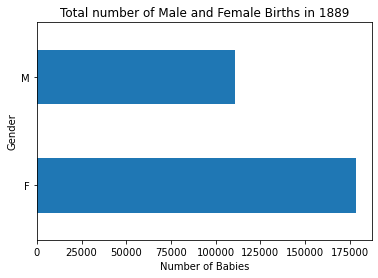

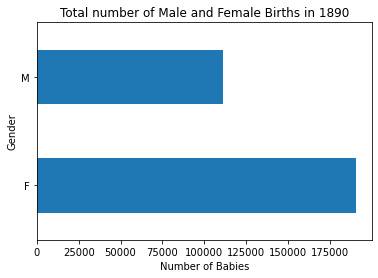

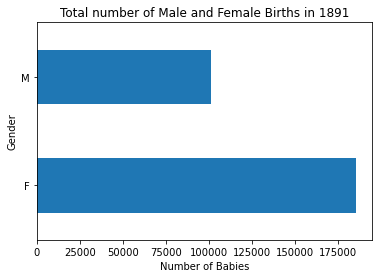

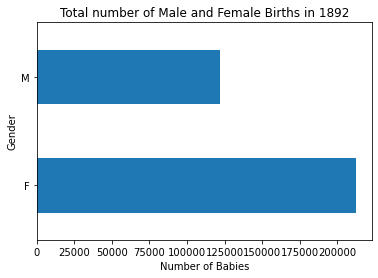

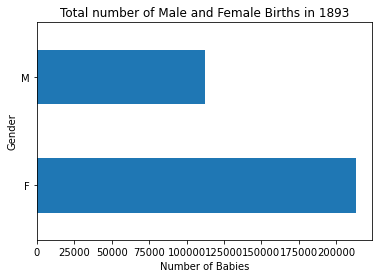

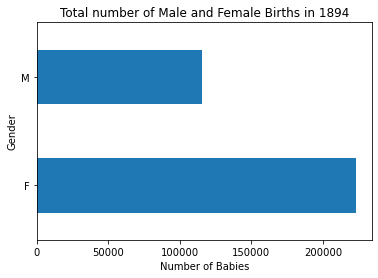

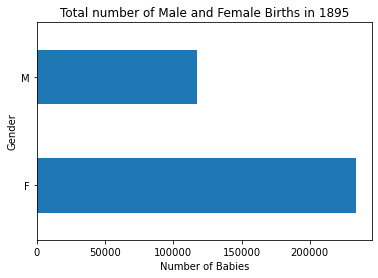

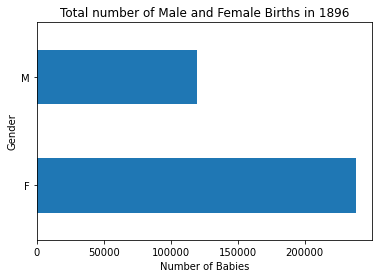

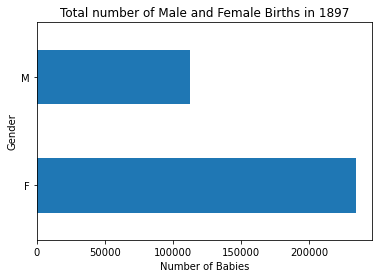

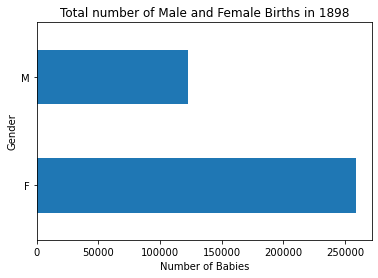

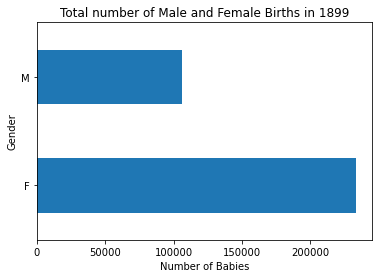

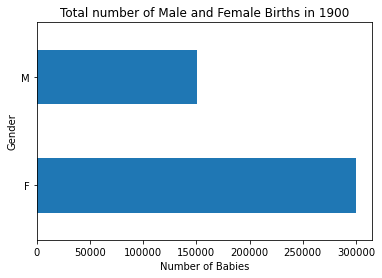

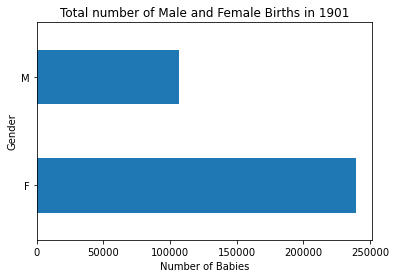

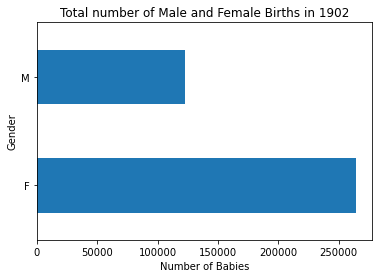

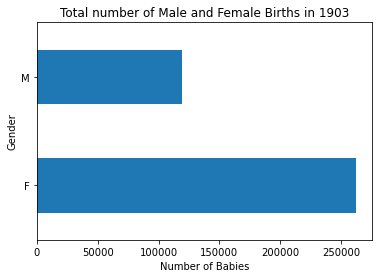

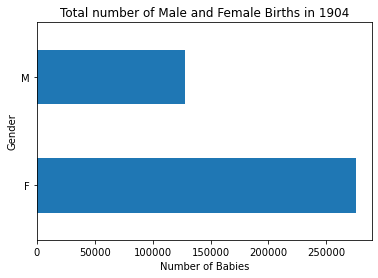

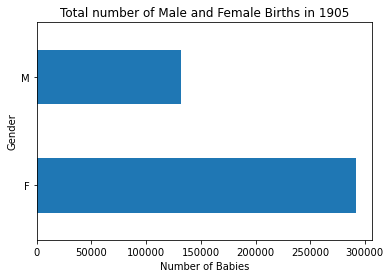

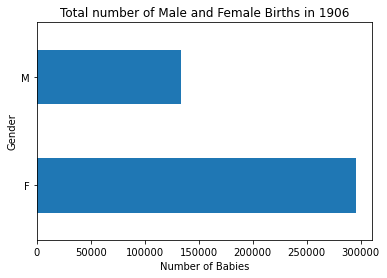

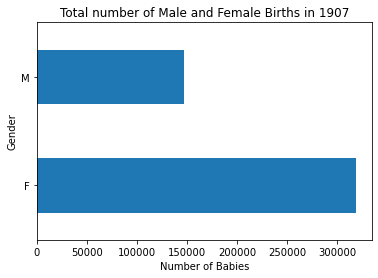

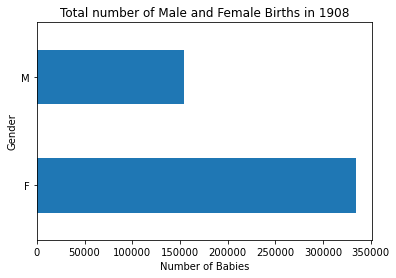

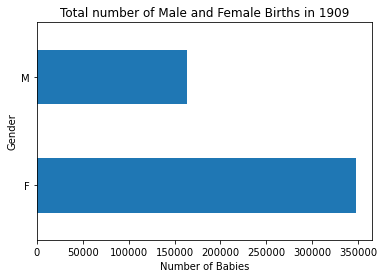

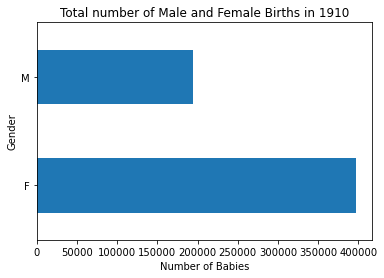

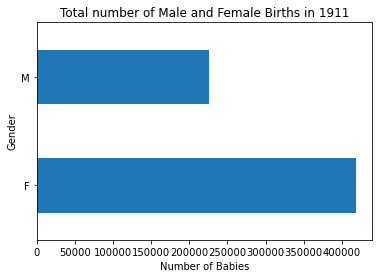

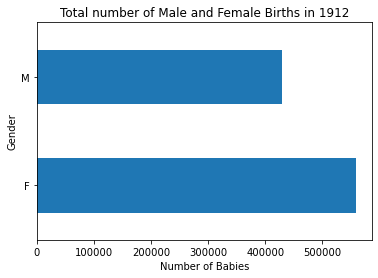

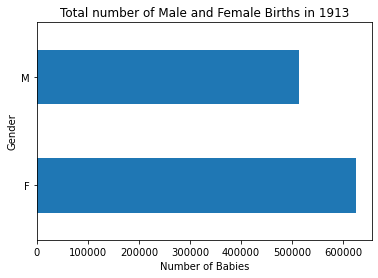

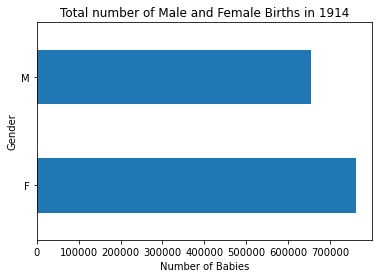

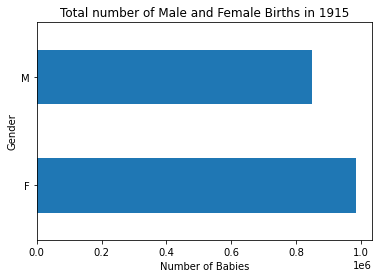

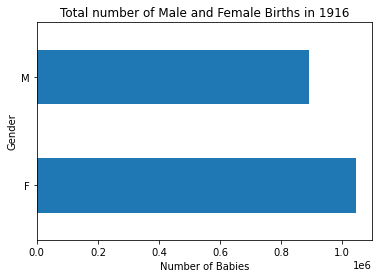

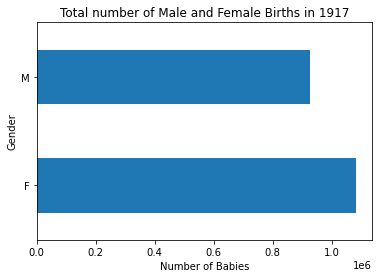

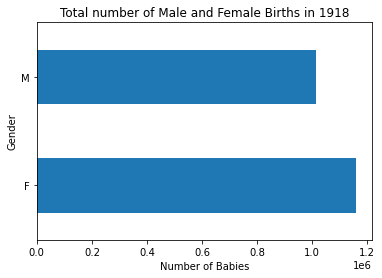

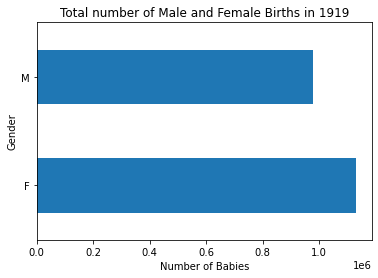

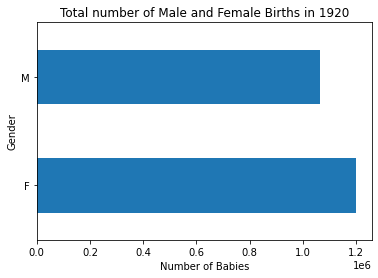

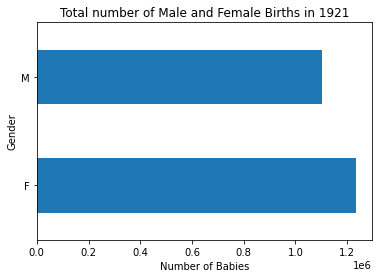

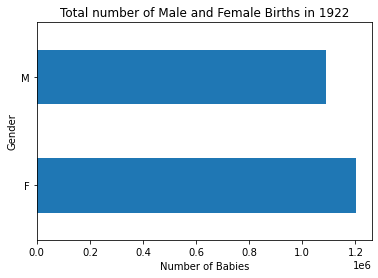

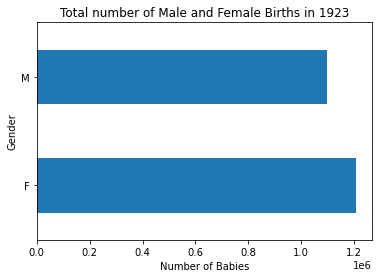

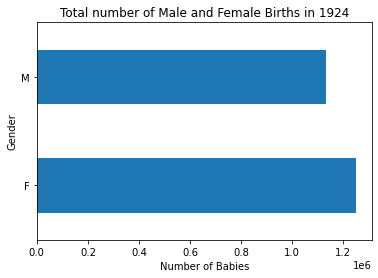

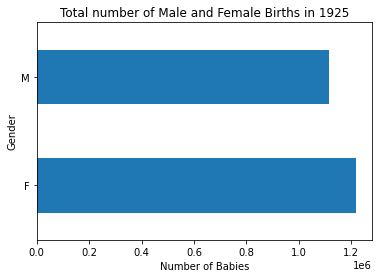

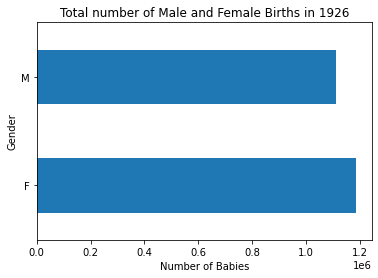

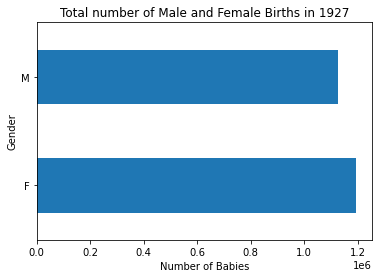

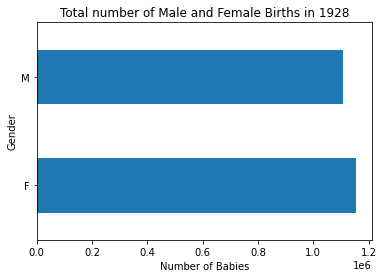

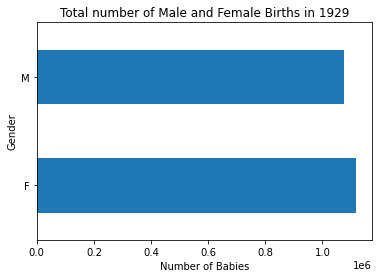

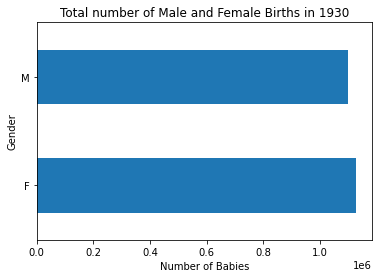

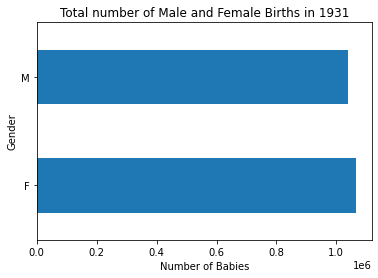

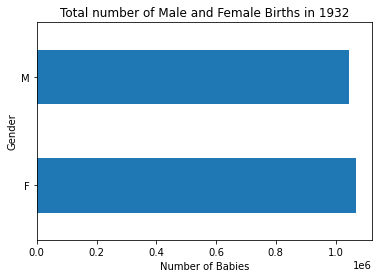

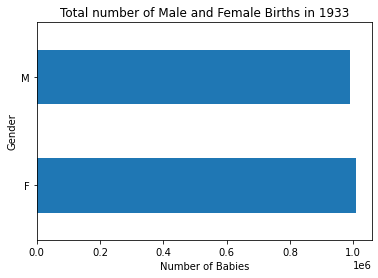

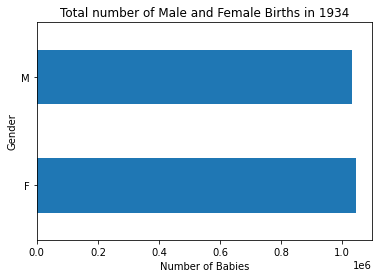

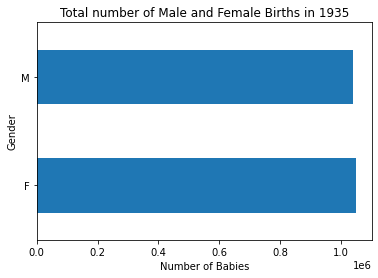

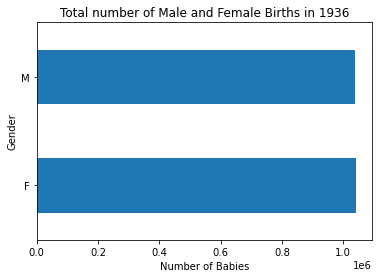

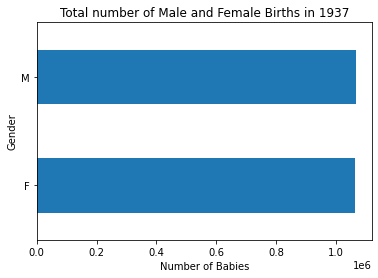

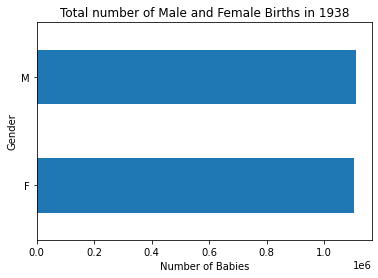

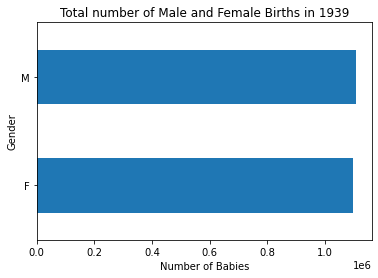

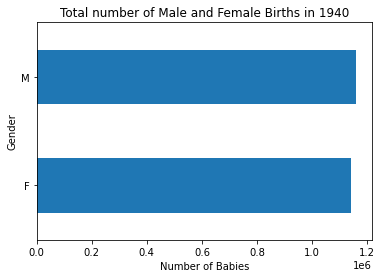

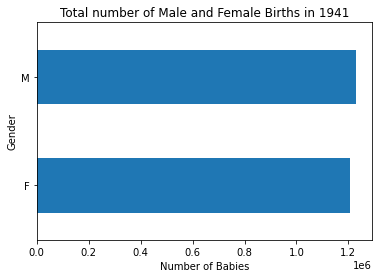

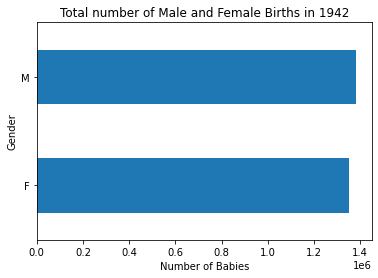

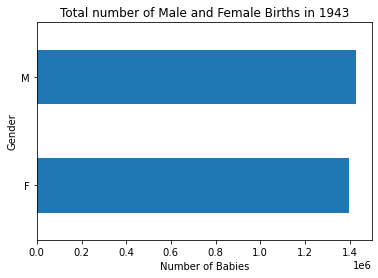

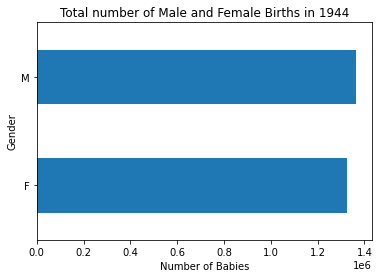

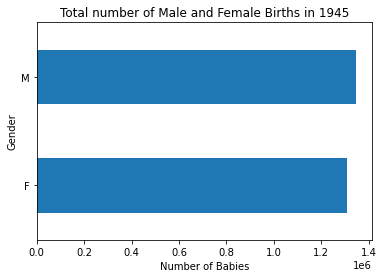

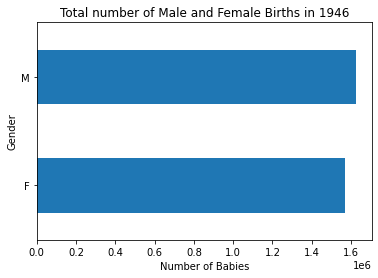

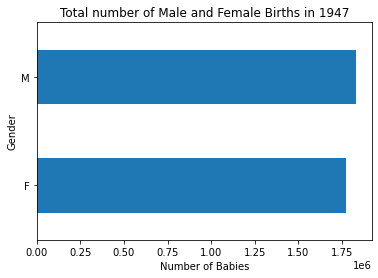

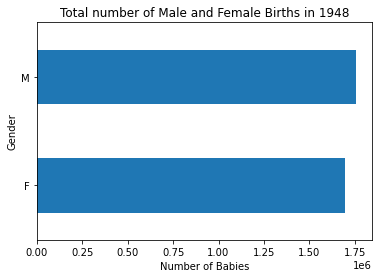

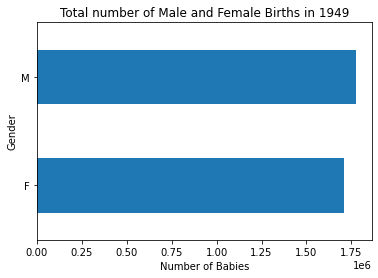

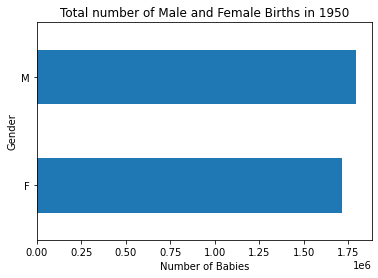

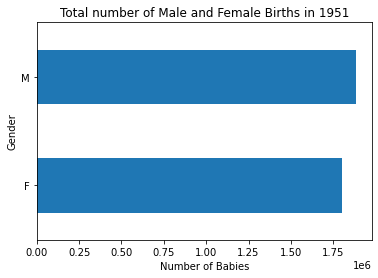

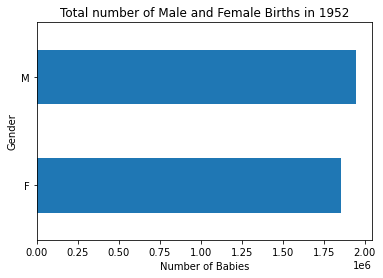

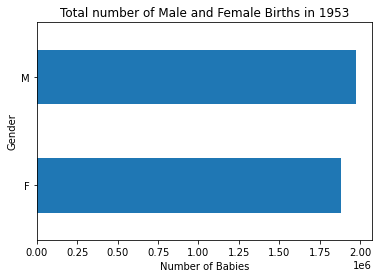

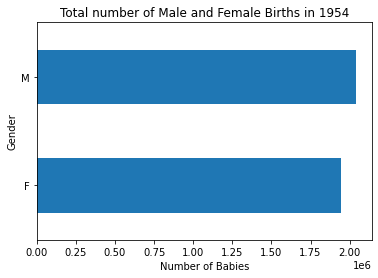

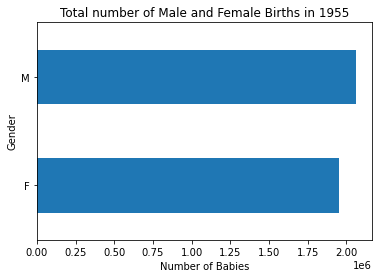

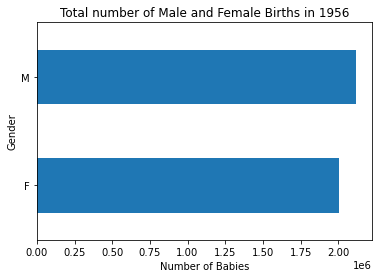

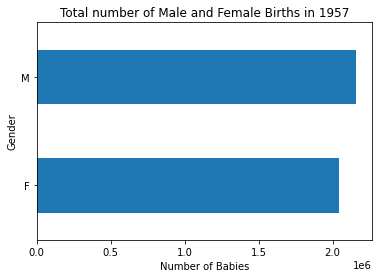

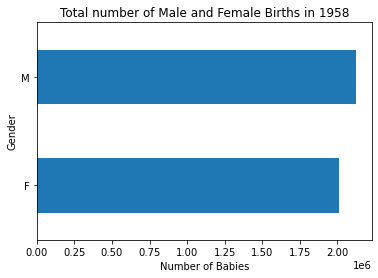

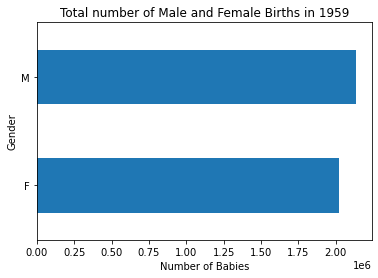

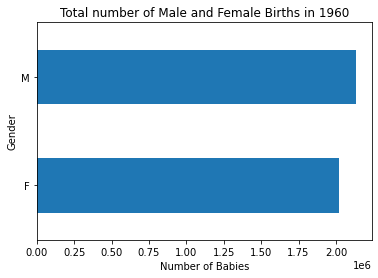

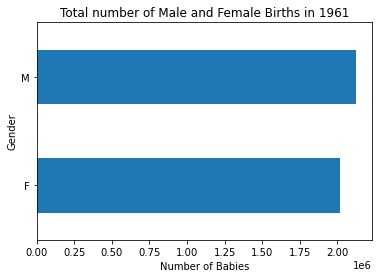

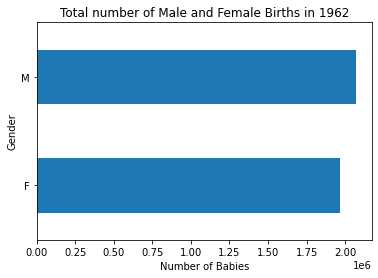

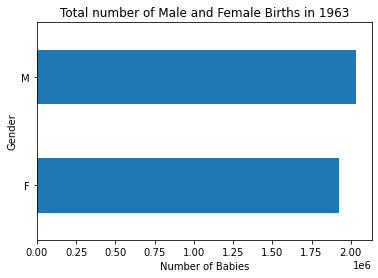

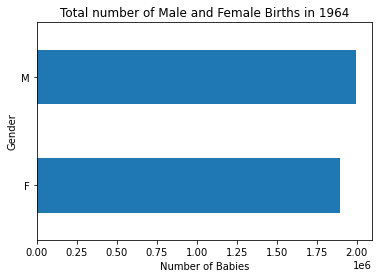

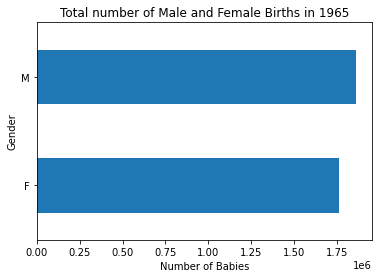

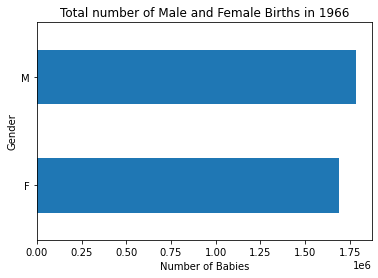

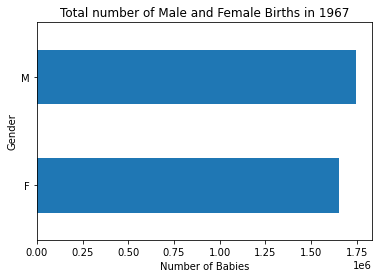

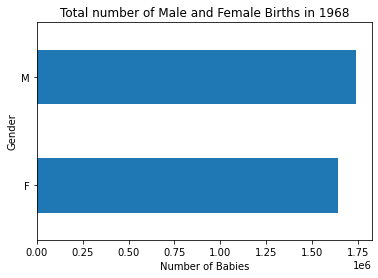

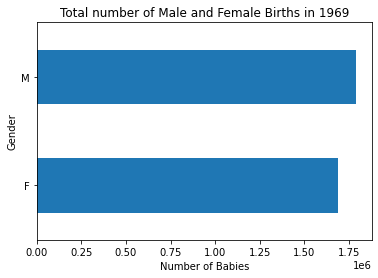

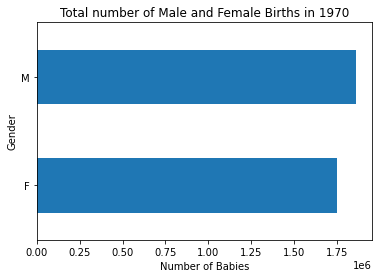

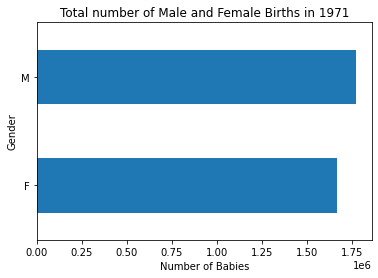

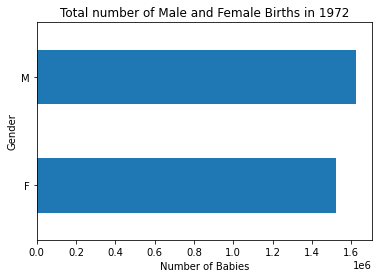

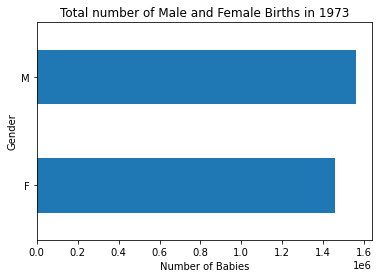

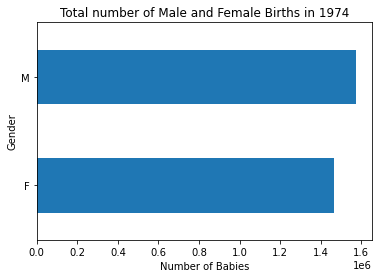

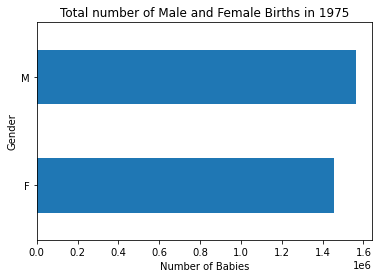

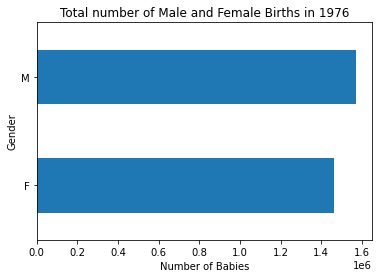

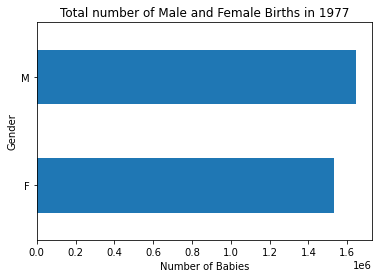

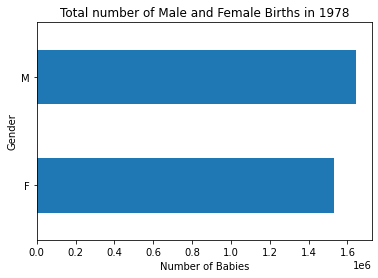

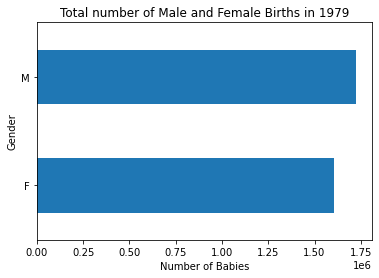

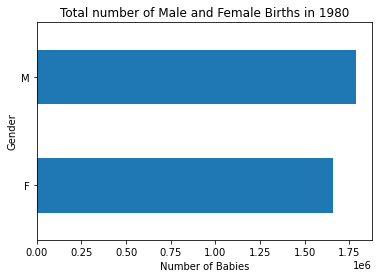

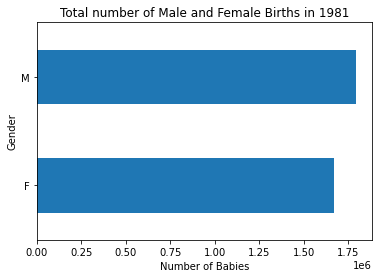

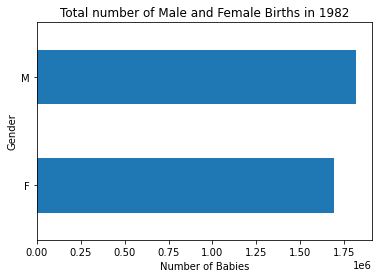

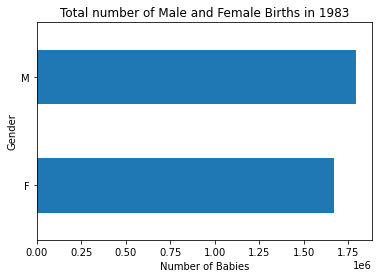

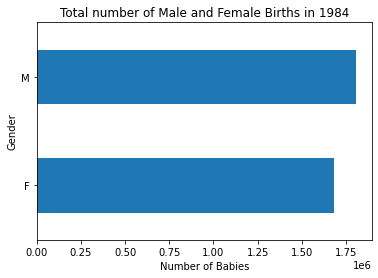

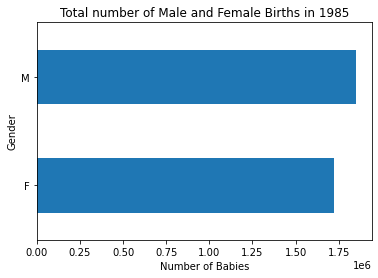

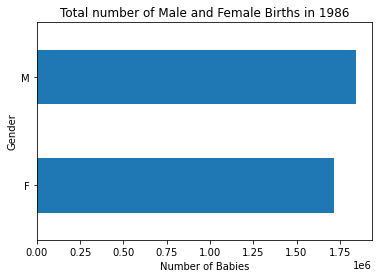

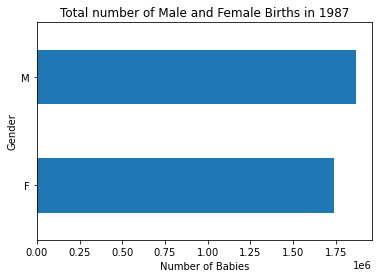

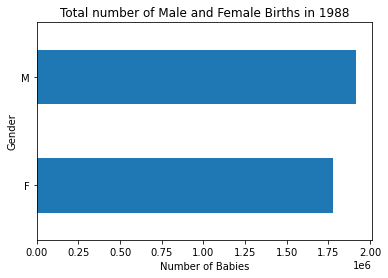

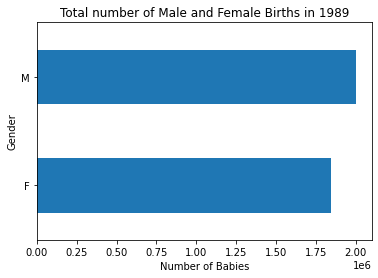

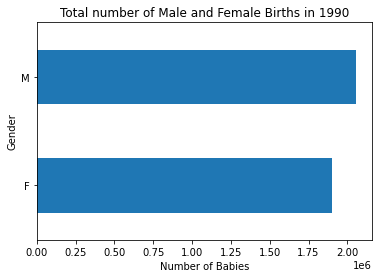

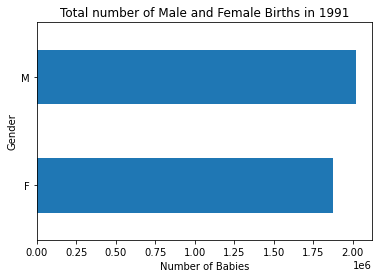

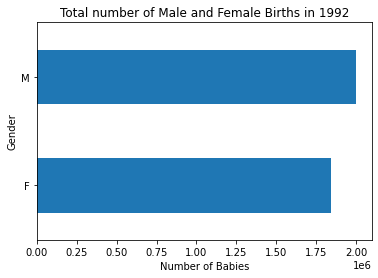

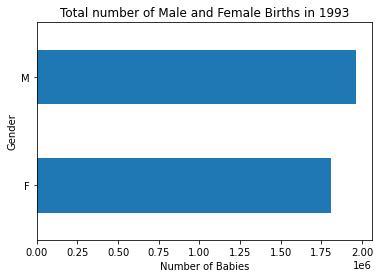

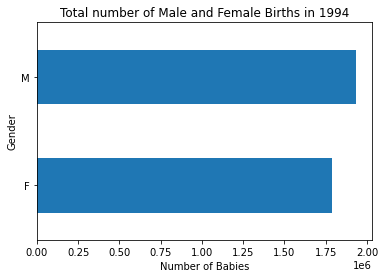

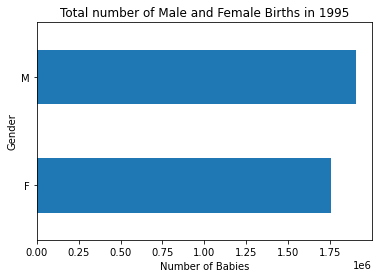

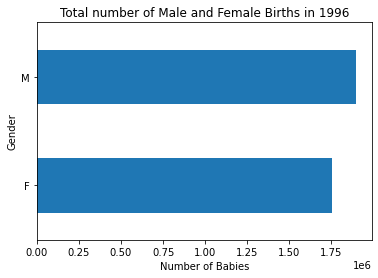

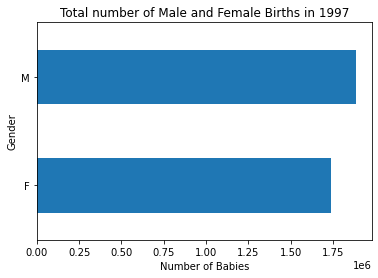

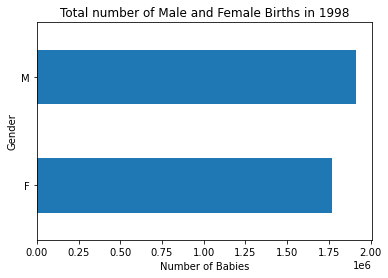

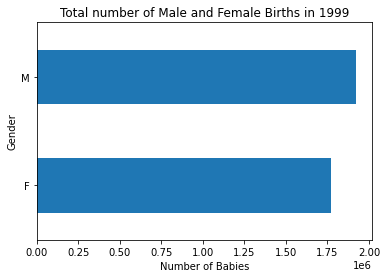

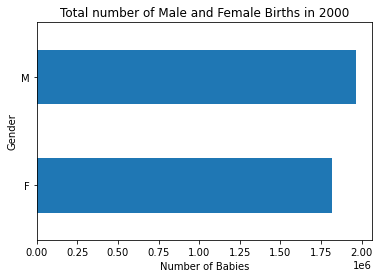

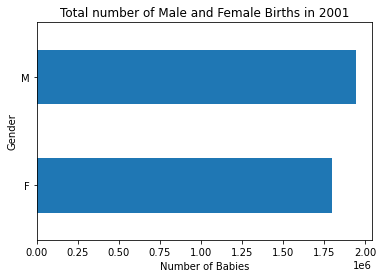

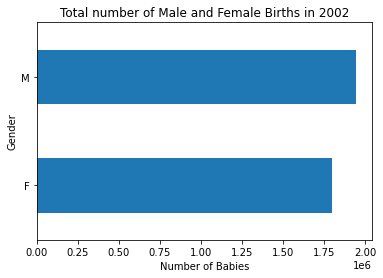

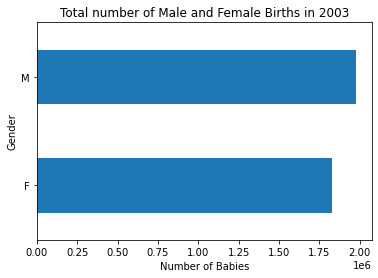

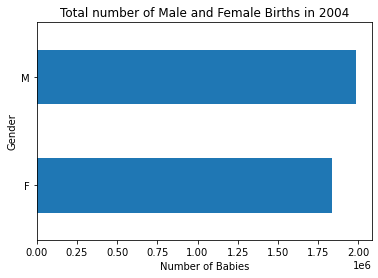

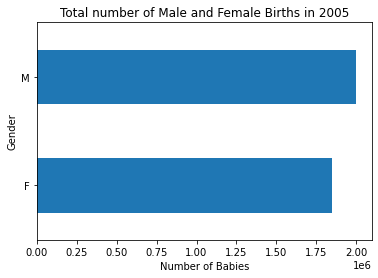

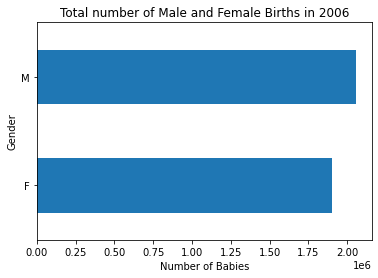

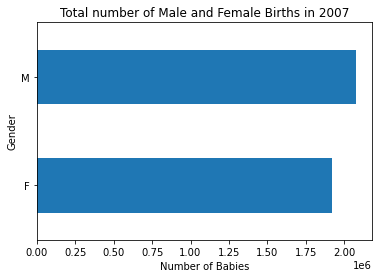

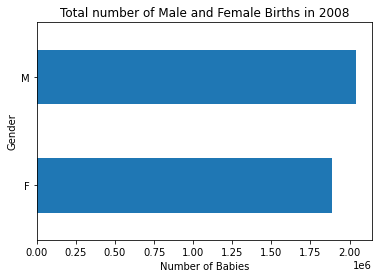

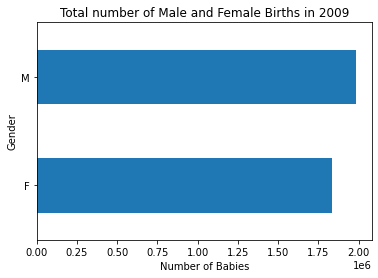

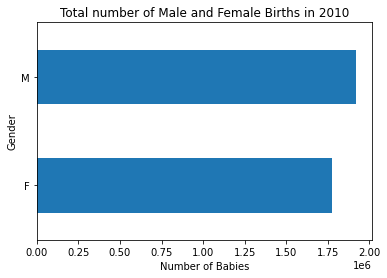

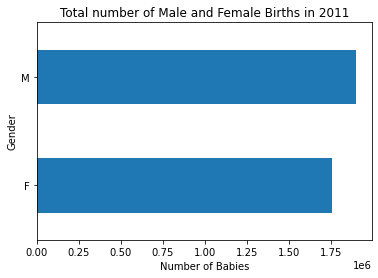

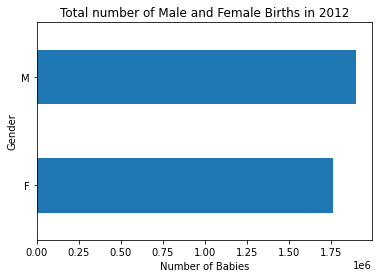

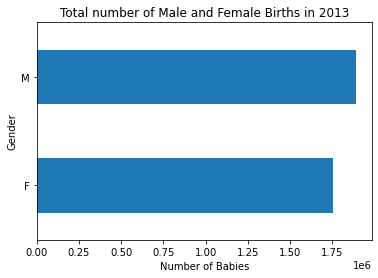

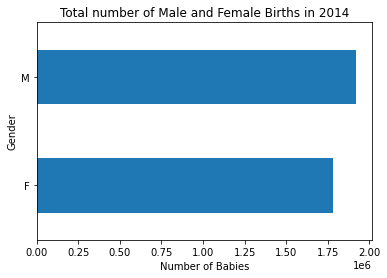

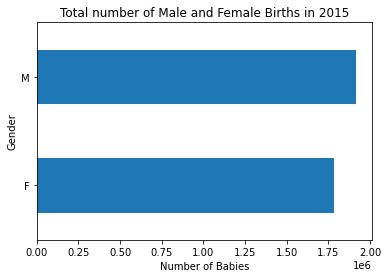

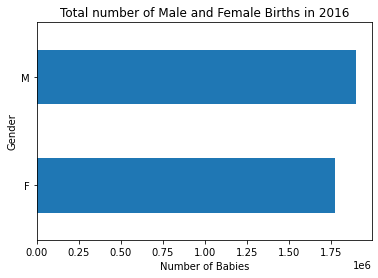

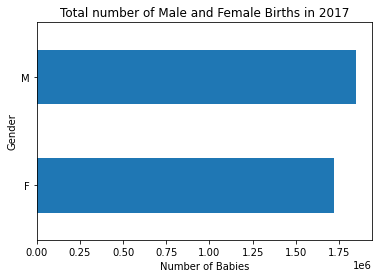

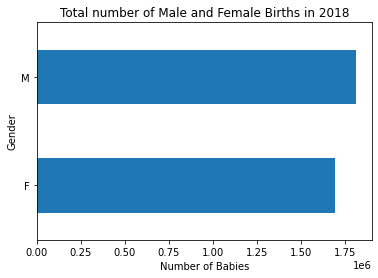

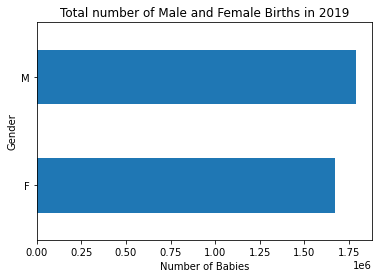

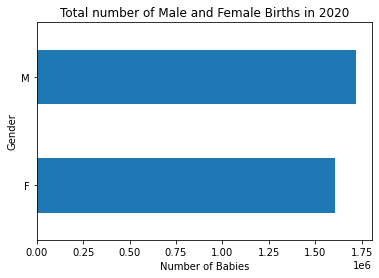

In [7]:
# Plot horizontal bar chart for yearwise Birth of babies 

births_by_year_gender = result.groupby(['Year', 'Sex'])['Babies'].sum().unstack()

for year, year_data in births_by_year_gender.iterrows():
    fig, ax = plt.subplots()
    year_data.plot(kind='barh', ax=ax)
    ax.set_xlabel('Number of Babies')
    ax.set_ylabel('Gender')
    ax.set_title(f'Total number of Male and Female Births in {year}')
    
plt.show()

<Figure size 1440x2880 with 0 Axes>

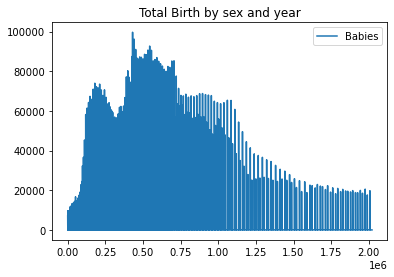

In [8]:
# Plot 'Total Birth by Sex and Year'

plt.figure(figsize=(20,40))
result.plot(title='Total Birth by sex and year')
plt.show()

In [9]:
# Sort Baby names

sort_baby_names = result.sort_values(by='Babies', ascending=False).reset_index(drop=True)
sort_baby_names.head(100)

,Name,Sex,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94762,1947
3,Michael,M,92723,1957
4,Robert,M,91651,1947
...,...,...,...,...
95,Michael,M,72800,1951
96,James,M,72555,1962
97,Robert,M,72349,1960
98,Mary,F,72177,1922


In [10]:
# Top 100 baby names and display it

top_100_names = sort_baby_names.head(100)
grouped_names = top_100_names[['Name','Babies']].groupby('Name').sum().sort_values(by='Babies', ascending=False)
grouped_names

,Babies
Name,
James,1808548
Michael,1768250
John,1525027
Robert,1467437
David,978084
Linda,441332
Mary,219697


In [11]:
def top_name(popular_name):
    return popular_name.sort_values(by='Year',ascending=False)[:10]
p_name=top_100_names.groupby(['Sex','Year'])
top_100=p_name.apply(top_name)
top_100.reset_index(inplace=True,drop=True)

In [12]:
# Analysing Name Trends

boy_name = top_100_names[top_100_names.Sex=='M']
girl_name = top_100_names[top_100_names.Sex=='F']

total_birth = top_100_names.pivot_table('Sex', index='Year', columns='Name', aggfunc= 'sum')
boy_name.head()

,Name,Sex,Babies,Year
2,James,M,94762,1947
3,Michael,M,92723,1957
4,Robert,M,91651,1947
6,Michael,M,90715,1956
7,Michael,M,90574,1958


In [13]:
girl_name.head()

,Name,Sex,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
5,Linda,F,91019,1949
60,Linda,F,80431,1950
90,Mary,F,73985,1921
